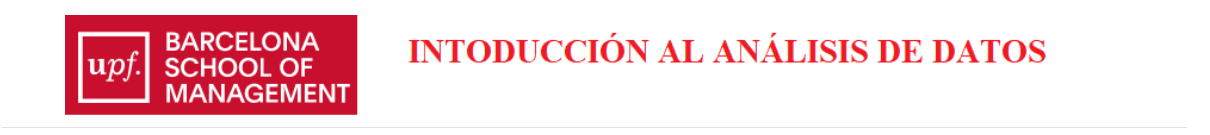

### Algunas Métricas de Riesgo de un stock: VaR teórico 

### Value at Risk (VaR)



El valor en riesgo es una medida utilizada para evaluar el riesgo financiero de una cartera de inversiones o posición abierta durante un periodo de tiempo.

El VaR estima el potencial de pérdida y la probabilidad de que esta se produzca en una inversion $I$

Se calcula el percentil 1% de la distribución para estimar el mínimo valor de rentabilidad que se espera obtener, luego se multiplica por el valor de la inversión $I$.
EL Var se expresa en Valor de acuerdo a la inversión


**Formas de Calculo :**

- **Teórico**: se prueba que la distribución de de los retornos satisface los supuestos de una distribución teórica, Y se usa la distribución teórica


**Ejemplo 1 :**

Para una inversion de un **dia** por un valor de 1000 U$ en el "NFLX" . 

Calcular el VaR al 99%

+ Cuál es la unidad de los datos ( dias)
+ Cuantos dias vamos a tener en cuenta?
+ Cuál es la ventana de tiempo de inversión (1 dia)

Abrir el archivo

In [5]:
#importar el archivo "NFLX.xlsx"
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

ad_df = pd.read_excel('C:/Users/Lenovo/Programacion/Python/BBDD/NFLX.xlsx', index_col=0, parse_dates=True)["Adj Close"]
ad_df.head()

Date
2020-10-05    520.650024
2020-10-06    505.869995
2020-10-07    534.659973
2020-10-08    531.789978
2020-10-09    539.440002
Name: Adj Close, dtype: float64

In [6]:
# calculamos los retornos ret  para "Adj Close" del año que tenemos
ret=ad_df.pct_change().dropna()
ret


Date
2020-10-06   -0.028388
2020-10-07    0.056912
2020-10-08   -0.005368
2020-10-09    0.014385
2020-10-12    0.000686
                ...   
2021-09-27    0.000422
2021-09-28   -0.014832
2021-09-29    0.026051
2021-09-30    0.018830
2021-10-01    0.004604
Name: Adj Close, Length: 250, dtype: float64

In [7]:
print(f' para los retornos diarios la media es:{ret.mean()},\n y la desviación {ret.std()}')

 para los retornos diarios la media es:0.0008854296157676531,
 y la desviación 0.021685295426719584


## Teórico: si los datos proceden de una  distribución  normal

Para calcular la normalidad de un conjunto de datos en Python, puedes utilizar estadísticas descriptivas, pruebas de normalidad o gráficos.



### 1.Gráficos

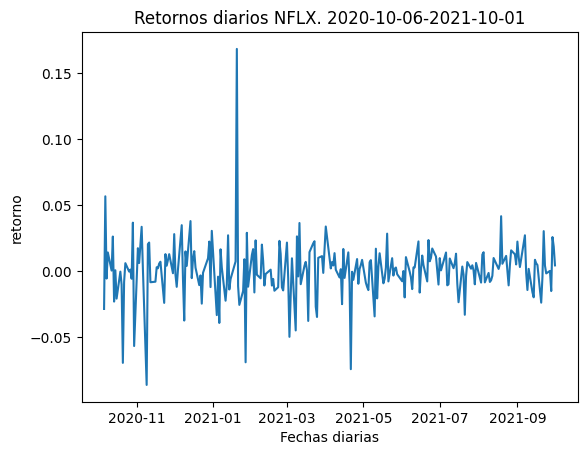

In [8]:
plt.plot(ret)
plt.title('Retornos diarios NFLX. 2020-10-06-2021-10-01')
plt.ylabel('retorno')
plt.xlabel('Fechas diarias')
plt.show()

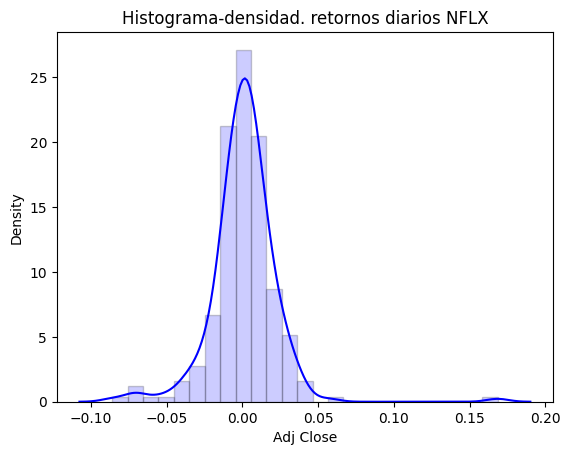

In [9]:
plt.hist(ret, bins=25, density=True, color='blue', edgecolor='black', alpha=0.2)
# Establecemos 'density=True' para que el histograma esté normalizado
plt.title('Histograma-densidad. retornos diarios NFLX')
# Superponer la curva de densidad a nuestros datos
sns.kdeplot(ret, color='blue', label='Curva de Densidad')
plt.show()

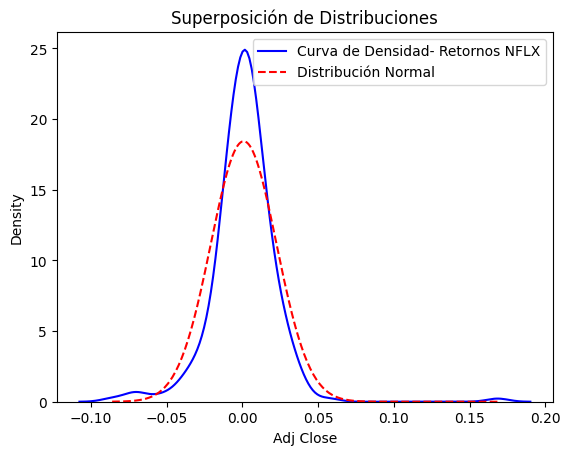

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm
import numpy as np

mu, std = norm.fit(ret)

x = np.linspace(ret.min(), ret.max(), ret.shape[0])  # Rango para el eje x
sns.kdeplot(ret, color='blue', label='Curva de Densidad- Retornos NFLX')

pdf = norm.pdf(x,mu, std)  # Distribución normal con media  0.000885 y desviación estándar 0.021685

plt.plot(x, pdf, 'r', linestyle='--', label='Distribución Normal')

# Personaliza el gráfico
plt.title("Superposición de Distribuciones")
plt.legend()
#plt.grid(True)
plt.show()

## 2.Estadísticas Descriptivas:

Se puede calcular estadísticas descriptivas básicas como la media,mediana, la curtosis y simetria  para tener una idea  aproximada de la  normalida de los datos 

In [12]:
import numpy as np

media = np.mean(ret)
mediana = np.median(ret)


from scipy.stats import kurtosis
curtosis = kurtosis(ret)

from scipy.stats import skew
simetria = skew(ret)

print(f'la media es:{media} \n la mediana: {mediana}, \n la curtosis: {curtosis} vs 3, \n la simetria:{simetria} vs 0')

la media es:0.0008854296157676531 
 la mediana: 0.0018032400009180272, 
 la curtosis: 15.19252006983561 vs 3, 
 la simetria:1.119014401563723 vs 0


## 3:Prueba de hipótesis

Para verificar si un conjunto de datos sigue una distribución normal, puedes utilizar la Prueba de Normalidad de Shapiro-Wilk o la Prueba de Normalidad de Kolmogorov-Smirnov. Ambas pruebas evalúan si una muestra se ajusta a una distribución normal. Se pueden realizar utilizando bibliotecas como scipy.stats y statsmodels.

La prueba de Kolmogorov-Smirnov se utiliza para muestras más grandes

La prueba de Shapiro-Wilk es una prueba de normalidad más adecuada para muestras pequeñas

La hipótesis a probar es:

Ho: Los datos provienen de  una distribución normal

H1:Los datos no provienen de una distribución normal

In [13]:
import scipy.stats as stats
import numpy as np




### Conclusión: Analizamos el riesgo con datos históricos

## VaR Histórico

In [14]:
#Calculamos el percentil 1%
import numpy as np

C1=np.percentile(ret,1)
C1

np.float64(-0.06900517677660474)

In [15]:
VaR=1000*C1
VaR

np.float64(-69.00517677660474)

In [16]:
print("""para una inversion de:1000U$ la máxima pérdida,
que se espera tener con un 99% de confianza es de:""", VaR )

para una inversion de:1000U$ la máxima pérdida,
que se espera tener con un 99% de confianza es de: -69.00517677660474
